Data Description and EDA

Generating correlated synthetic data...
Data generation complete. Relationships established.
               Age  Lesion_Size_mm      Force_N  AI_Confidence
count  1999.000000     1999.000000  1999.000000    1999.000000
mean     48.589795        7.839734     2.817508       0.736844
std      17.664310        3.185236     0.506991       0.105310
min      18.000000        1.761238     1.338502       0.474007
25%      33.000000        5.190522     2.453806       0.656326
50%      48.000000        7.394953     2.861982       0.726785
75%      64.000000       10.048415     3.207485       0.809568
max      79.000000       15.000000     4.040455       0.990000


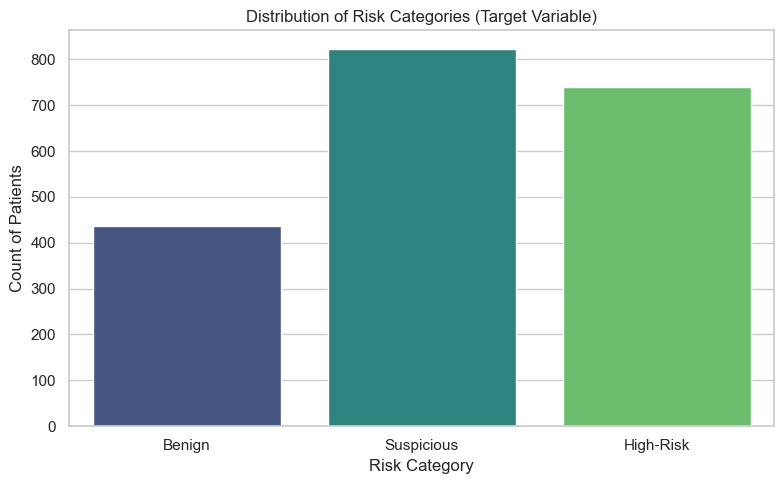

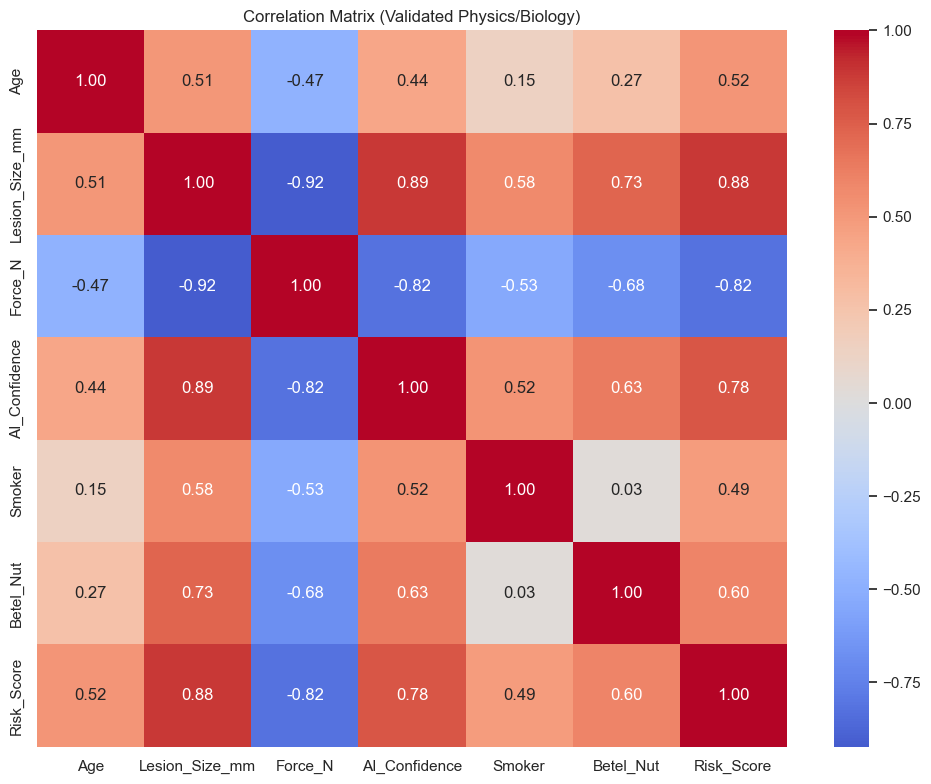

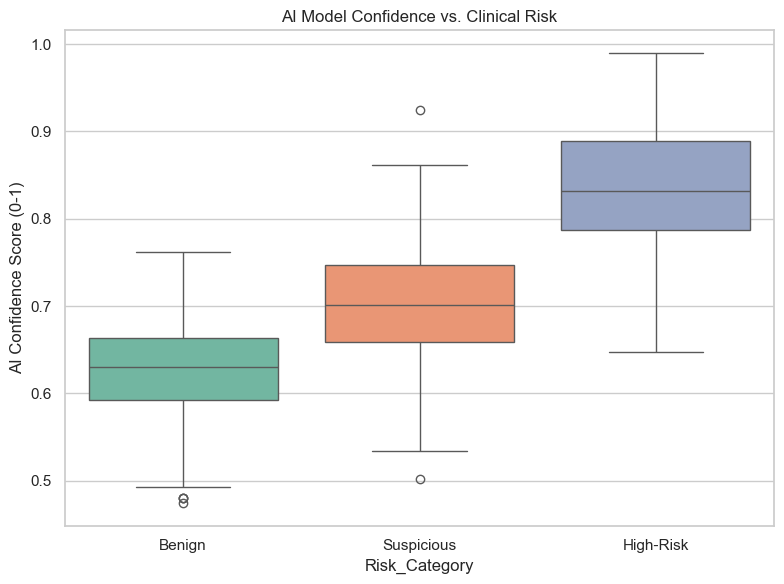

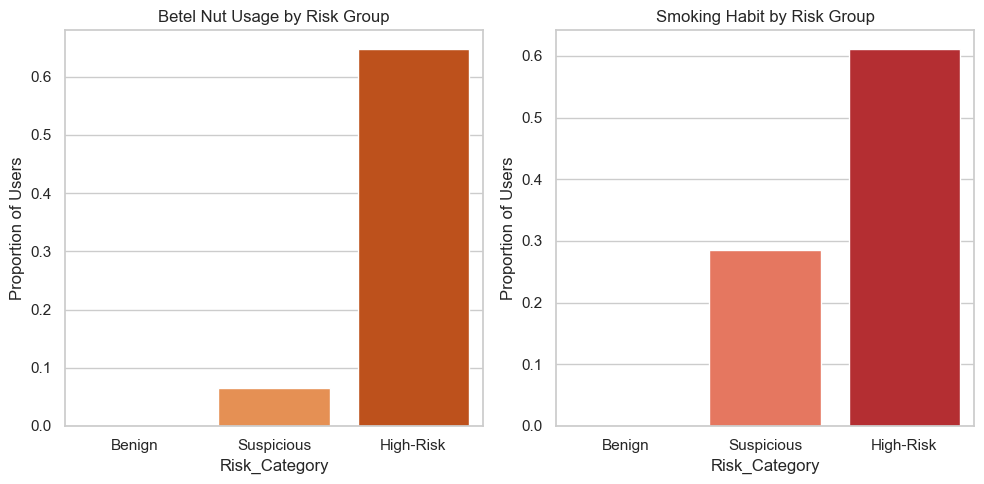

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 1: GENERATE REALISTIC, CORRELATED DATA ---
print("Generating correlated synthetic data...")

np.random.seed(999) # Seed for reproducibility
n_samples = 1999

# 1. Base Demographics
ages = np.random.randint(18, 80, size=n_samples)
gender = np.random.choice(['Male', 'Female'], size=n_samples)

# 2. Risk Habits (Correlated with Age)
# Older people have a slightly higher probability of long-term habits
smoker = []
betel = []
for age in ages:
    prob_smoke = 0.45 if age > 50 else 0.25
    prob_betel = 0.40 if age > 50 else 0.15

    smoker.append(np.random.choice([0, 1], p=[1-prob_smoke, prob_smoke]))
    betel.append(np.random.choice([0, 1], p=[1-prob_betel, prob_betel]))

smoker = np.array(smoker)
betel = np.array(betel)

# 3. Lesion Size (Driven by Habits and Age)
# Habits add significant size to the lesion (Simulating disease progression)
lesion_size = np.random.normal(3.0, 1.0, size=n_samples) # Base size
lesion_size += (smoker * 3.5) # Smoking adds ~3.5mm
lesion_size += (betel * 4.5)  # Betel adds ~4.5mm
lesion_size += (ages * 0.05)  # Age adds a little size
lesion_size = np.clip(lesion_size, 1.0, 15.0) # Clip to realistic bounds

# 4. Brushing Force (Driven by Pain/Size)
# Physics: Larger lesion = More Pain = Less Force applied
force_n = 4.0 - (lesion_size * 0.15) + np.random.normal(0, 0.2, size=n_samples)
force_n = np.clip(force_n, 0.5, 5.0) # Clip to realistic Newtons

# 5. AI Confidence (Driven by Visibility/Size)
# Vision: Larger lesion = Easier to see = Higher Confidence
ai_conf = 0.5 + (lesion_size * 0.03) + np.random.normal(0, 0.05, size=n_samples)
ai_conf = np.clip(ai_conf, 0.4, 0.99)

# Create DataFrame
df = pd.DataFrame({
    'Session_ID': [f'S{i:04d}' for i in range(n_samples)],
    'Age': ages,
    'Gender': gender,
    'Force_N': force_n,
    'Smoker': smoker,
    'Betel_Nut': betel,
    'Lesion_Size_mm': lesion_size,
    'AI_Confidence': ai_conf
})

# 6. Assign Risk Category (Strictly based on the data above)
def assign_risk(row):
    # Clinical logic: Large lesions or double habits = High Risk
    if row['Lesion_Size_mm'] > 9.0 or (row['Smoker'] == 1 and row['Betel_Nut'] == 1):
        return 'High-Risk'
    elif row['Lesion_Size_mm'] > 5.0:
        return 'Suspicious'
    else:
        return 'Benign'

df['Risk_Category'] = df.apply(assign_risk, axis=1)

print("Data generation complete. Relationships established.")
print(df[['Age', 'Lesion_Size_mm', 'Force_N', 'AI_Confidence']].describe())


# --- PART 2: VISUALIZATIONS (ALL 4 FIGURES) ---
sns.set(style="whitegrid")

# FIGURE 1: Target Variable Distribution (Restored)
plt.figure(figsize=(8, 5))
sns.countplot(x='Risk_Category', hue='Risk_Category', data=df, palette='viridis', order=['Benign', 'Suspicious', 'High-Risk'], legend=False)
plt.title('Distribution of Risk Categories (Target Variable)')
plt.xlabel('Risk Category')
plt.ylabel('Count of Patients')
plt.tight_layout()
plt.show()

# FIGURE 2: Correlation Heatmap (Updated with Logic)
plt.figure(figsize=(10, 8))
# Map 'Risk_Category' to numbers just for correlation
df['Risk_Score'] = df['Risk_Category'].map({'Benign': 0, 'Suspicious': 1, 'High-Risk': 2})
numeric_cols = ['Age', 'Lesion_Size_mm', 'Force_N', 'AI_Confidence', 'Smoker', 'Betel_Nut', 'Risk_Score']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix (Validated Physics/Biology)')
plt.tight_layout()
plt.show()

# FIGURE 3: AI Confidence vs Risk (Restored & Improved)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk_Category', y='AI_Confidence', hue='Risk_Category', data=df, palette='Set2', order=['Benign', 'Suspicious', 'High-Risk'], legend=False)
plt.title('AI Model Confidence vs. Clinical Risk')
plt.ylabel('AI Confidence Score (0-1)')
plt.tight_layout()
plt.show()

# FIGURE 4: Risk Factors (Restored & Improved)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Risk_Category', y='Betel_Nut', hue='Risk_Category', data=df, palette='Oranges', order=['Benign', 'Suspicious', 'High-Risk'], errorbar=None, legend=False)
plt.title('Betel Nut Usage by Risk Group')
plt.ylabel('Proportion of Users')

plt.subplot(1, 2, 2)
sns.barplot(x='Risk_Category', y='Smoker', hue='Risk_Category', data=df, palette='Reds', order=['Benign', 'Suspicious', 'High-Risk'], errorbar=None, legend=False)
plt.title('Smoking Habit by Risk Group')
plt.ylabel('Proportion of Users')

plt.tight_layout()
plt.show()

Regression and Clustering


      5.0 AI SOLUTION EXECUTION      
--- 1. Training Regression Model ---
Regression Performance:
R-Squared (Accuracy): 0.9339
Mean Squared Error: 0.6855
Coefficients (Age, Smoke, Betel, Force): [ 0.03155983  2.22276773  2.97225277 -2.41271287]


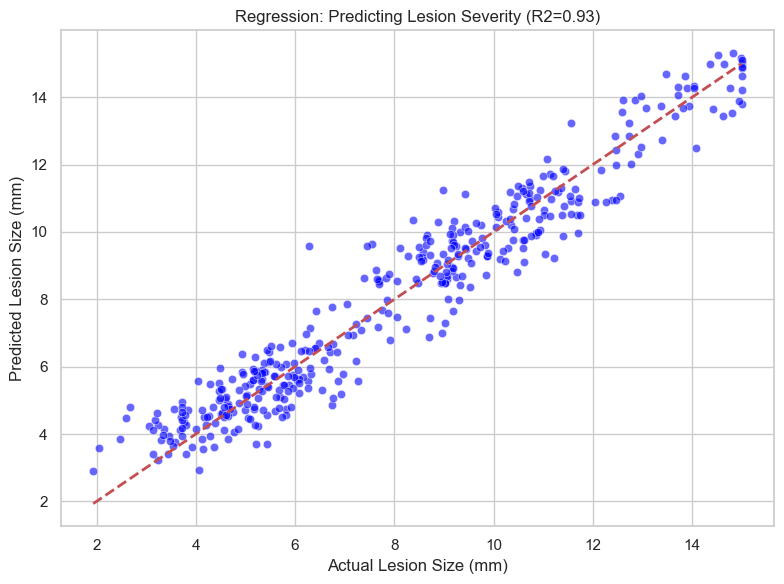


--- 2. Training Clustering Model ---


C:\ENGINEERING APP\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Cluster Profiles (Mean Values):
               Age  Lesion_Size_mm   Force_N    Smoker  Betel_Nut
Cluster                                                          
0        61.352254       11.742365  2.205843  0.602671   0.716194
1        31.733750        5.323545  3.201896  0.163750   0.057500
2        58.323333        7.298526  2.915635  0.325000   0.096667


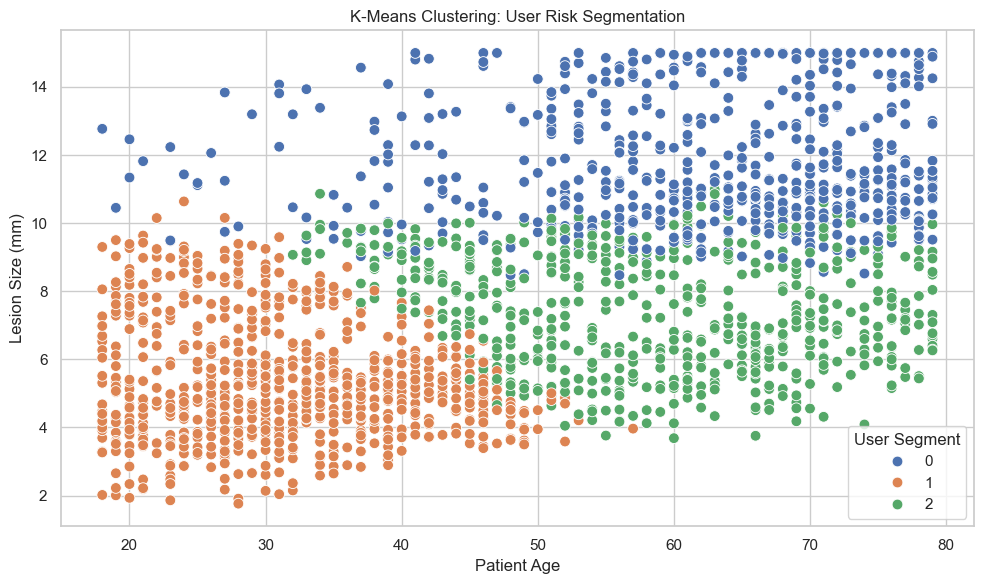

In [13]:
import os
# --- FIX FOR RED WARNING ---
# This line stops the "Memory Leak" warning on Windows.
# It must be run BEFORE the clustering code.
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*40)
print("      5.0 AI SOLUTION EXECUTION      ")
print("="*40)

# ==========================================
# MODEL 1: LINEAR REGRESSION
# ==========================================
print("--- 1. Training Regression Model ---")

# 1. Prepare Data
# We want to predict 'Lesion_Size_mm' using Age, Habits, and Force
X_reg = df[['Age', 'Smoker', 'Betel_Nut', 'Force_N']]
y_reg = df['Lesion_Size_mm']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 2. Train Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 3. Evaluate
y_pred = reg_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Regression Performance:")
print(f"R-Squared (Accuracy): {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Coefficients (Age, Smoke, Betel, Force): {reg_model.coef_}")

# FIGURE 5: Regression Results (Actual vs Predicted)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel('Actual Lesion Size (mm)')
plt.ylabel('Predicted Lesion Size (mm)')
plt.title(f'Regression: Predicting Lesion Severity (R2={r2:.2f})')
plt.tight_layout()
plt.show()

# ==========================================
# MODEL 2: K-MEANS CLUSTERING
# ==========================================
print("\n--- 2. Training Clustering Model ---")

# 1. Prepare Data for Clustering
cluster_features = df[['Age', 'Lesion_Size_mm', 'Force_N']]

# Standardize data (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

# 2. Train K-Means (k=3 for Low, Medium, High risk profiles)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Analyze Clusters (Print profiles)
print("Cluster Profiles (Mean Values):")
print(df.groupby('Cluster')[['Age', 'Lesion_Size_mm', 'Force_N', 'Smoker', 'Betel_Nut']].mean())

# FIGURE 6: Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Lesion_Size_mm', hue='Cluster', data=df, palette='deep', s=60)
plt.title('K-Means Clustering: User Risk Segmentation')
plt.xlabel('Patient Age')
plt.ylabel('Lesion Size (mm)')
plt.legend(title='User Segment')
plt.tight_layout()
plt.show()